In [91]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

Aqui é feita a formatação do dinheiro, separando a moeda e os imóveis que estão sendo alugados

In [92]:
dados[["Moeda", "Valor_vendas", "Tipo_vendas"]] = dados["Valor"].str.split(expand = True)

In [93]:
dados_vendas = dados[dados["Tipo_vendas"].isna()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [94]:
dados_vendas["Valor_vendas_float"] = dados_vendas["Valor_vendas"].str.replace(".","").astype(float)

C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\1132571621.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_vendas_float"] = dados_vendas["Valor_vendas"].str.replace(".","").astype(float)
C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\1132571621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_vendas_float"] = dados_vendas["Valor_vendas"].str.replace(".","").astype(float)


O gráfico a seguir mostra os valores inteiros e em milhões

In [95]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_vendas["Valor_vendas_milhoes"] = dados_vendas['Valor_vendas_float']/1000000

dados_vendas.describe()

C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\2878592431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_vendas_milhoes"] = dados_vendas['Valor_vendas_float']/1000000


,Metragem,Quartos,Banheiros,Vagas,Valor_vendas_float,Valor_vendas_milhoes
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,3.05
std,7856.42,1.05,1.97,2.60,3944208.19,3.94
min,10.00,1.00,1.00,1.00,13000.00,0.01
25%,168.00,3.00,2.00,2.00,890000.00,0.89
50%,276.00,3.00,4.00,4.00,1800000.00,1.80
75%,450.00,4.00,5.00,5.00,3500000.00,3.50
max,750000.00,16.00,40.00,50.00,65000000.00,65.00


Adicionando uma coluna para poder analizar o preço por metro quadrado

In [96]:
dados_vendas["Valor_metragem"] = dados_vendas["Valor_vendas_float"]/dados_vendas["Metragem"]
dados_vendas

C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\1002993525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_metragem"] = dados_vendas["Valor_vendas_float"]/dados_vendas["Metragem"]


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,5121.95


Uma tabela para analizar as médias de cada bairro

In [97]:
dados_bairro = dados_vendas.groupby("Bairro").mean()
dados_bairro["Valor_metragem_bairro"] = dados_bairro["Valor_vendas_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem,Valor_metragem_bairro
Bairro,,,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17,7162.69
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57,5708.74
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,2.08,7606.73,6961.30
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,1.18,5691.74,4385.00
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,4.78,11269.98,11126.34
...,...,...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,0.65,4467.13,4283.84
Água Branca,173.58,3.08,3.25,2.25,1226500.00,1.23,7269.11,7065.77
Água Fria,165.42,2.83,3.42,2.50,927083.33,0.93,5841.10,5604.53


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem,Valor_metragem_bairro
0,Aclimação,246.16,3.27,3.04,2.91,1763200.01,1.76,7656.17,7162.69
1,Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,2.39,5849.57,5708.74
2,Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,2.08,7606.73,6961.30
3,Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,1.18,5691.74,4385.00
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,4.78,11269.98,11126.34
...,...,...,...,...,...,...,...,...,...
692,Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,0.65,4467.13,4283.84
693,Água Branca,173.58,3.08,3.25,2.25,1226500.00,1.23,7269.11,7065.77
694,Água Fria,165.42,2.83,3.42,2.50,927083.33,0.93,5841.10,5604.53
695,Água Funda,139.00,3.00,2.50,2.00,545000.00,0.55,3876.86,3920.86


Text(0, 0.5, 'Valor Médio da Metragem')

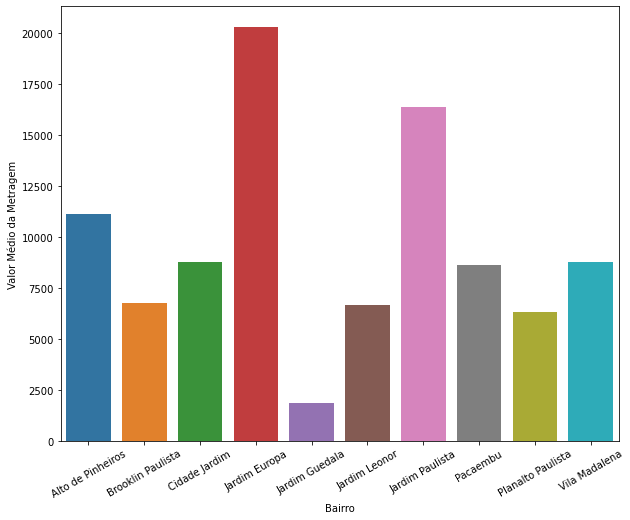

In [99]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Bairro", y="Valor_metragem_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis="x", rotation=30)
ax.set_ylabel("Valor Médio da Metragem")

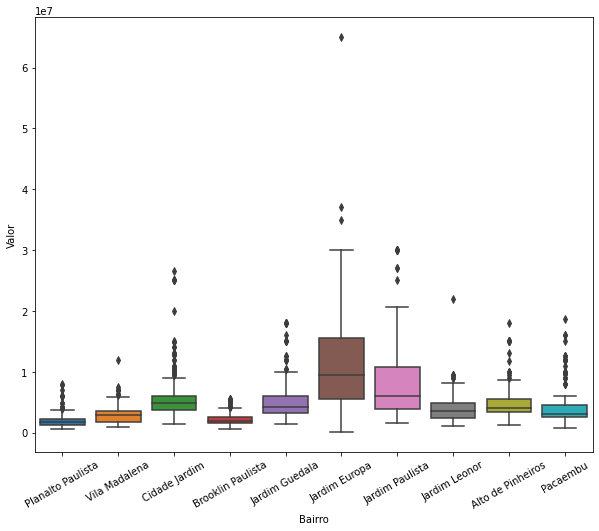

In [100]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro",y="Valor_vendas_float")
ax.tick_params(axis="x",rotation=30)
ax.set_ylabel("Valor")
plt.show()

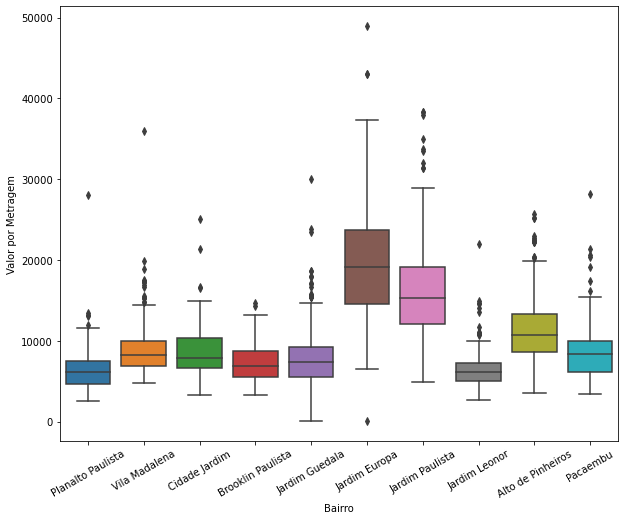

In [101]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros"), x="Bairro",y="Valor_metragem")
ax.tick_params(axis="x",rotation=30)
ax.set_ylabel("Valor por Metragem")
plt.show()

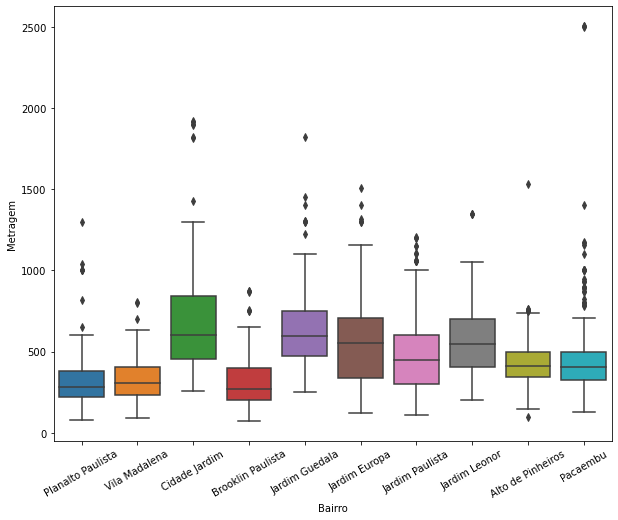

In [102]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro",y="Metragem")
ax.tick_params(axis="x",rotation=30)
plt.show()

Formatação do censo do IBGE 2010

In [103]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
ibge = pd.read_csv(ibge_url, encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")
ibge.dropna(how="all", axis=1, inplace=True)
ibge.Nome_Grande_Regiao = "Regiao Sudeste"
ibge.Nome_da_meso = "Metropolitana de Sao Paulo"
ibge.Nome_da_micro = "Sao Paulo"
ibge["Nome_da_UF "] = "Sao Paulo"
ibge.rename(columns = {'Cod_Grandes Regiï¿½es':'Cod_Grandes_Regioes'}, inplace = True)
ibge.head(1)

,Cod_setor,Cod_Grandes_Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86


In [104]:
enderecos = pd.read_csv(r"C:\Users\caiop\OneDrive\Área de Trabalho\Hello World\data-science\enderecos.csv")
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos.head(1)

C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\2333793786.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  enderecos = pd.read_csv(r"C:\Users\caiop\OneDrive\Área de Trabalho\Hello World\data-science\enderecos.csv")
C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\2333793786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\2333793786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55


In [105]:
dados_vendas["Apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas["Apenas_rua"] = dados_vendas["Apenas_rua"].str.lower().str.strip()
dados_vendas.head()

C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\365020354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
C:\Users\caiop\AppData\Local\Temp\ipykernel_10340\365020354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Apenas_rua"] = dados_vendas["Apenas_rua"].str.lower().str.strip()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem,Apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00,rua tobias barreto


Vinculando banco de dados

In [108]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "Apenas_rua", right_on = "rua").drop_duplicates(subset=dados_vendas.columns).query("cep > 0")
dados_geo = dados_geo[dados_geo["Apenas_rua"].notna()]
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_vendas,Tipo_vendas,Valor_vendas_float,Valor_vendas_milhoes,Valor_metragem,Apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
39,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None,1980000.00,1.98,4500.00,rua graham bell,rua graham bell,4737030.00,-23.59,-46.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63
